# Model selection and  assessment

We discussed during class why it is appropriate to hold-out part of the data as a test dataset

$$ \hat{L} = \frac{1}{n_T} \sum_{(x,y)\in T} \ell(y, \hat{f}(x)), \quad \textit{TRAINING ERROR} $$

$$ \hat{L}_{HO} = \frac{1}{n_{HO}} \sum_{(x,y)\in HO} \ell(y, \hat{f}(x)), \quad \textit{HOLD-OUT ERROR} $$

with $\hat{f}$ being the solution of the training set $T$.

In actual applications, there are often two steps to solving a prediction problem: model selection and model assessment. In model selection we estimate the performance of various competing models with the hope of choosing the best one. Having chosen the final model, we assess the model by estimating the prediction error on new unseen data.

Class of models $\hat{f}_{\alpha}$: one should not use the test dataset for selecting $\alpha$. 

One could divide the data in three parts: 
- train;
- validation;
- (hold-out) test.

We use the training and validation data to select the best model and the test data to assess the chosen model.
The recipe is the following:

1.  We train all competing model on the train data and define the best model as the one that predicts best in the validation set.  We could re-split the train/validation data, do this many times, and select the method that, on average, performs the best.

2.  We chose the best model among many competitors, hence the observed performance will be a bit biased. Therefore, to appropriately assess performance on independent data we look at the score on the test set.


A common problem: when the amout of data is limited, the results from fitting a model to splitted data can be substantially different to fitting to the complete dataset. Indeed, when the number of samples is small (smaller than the number of variables) we do not have enough examples to approach the problem as described above. Thus, we need to perform a cross-validation procedure that returns a mean error score on the data.

## Exercise #1: Splitting Techniques

Given the California-housing dataset, use the following splitting methods:
- **K-fold** : split dataset into k consecutive folds. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
- **Monte Carlo** : randomly split the dataset into training and test sets(we need to specify the percentage of the test data points and an initial random state for reshuffling the data. We set `test_size = 0.2` and `random_state = 1`).
- **Leave One Out** : provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

**Compute the mean and standard deviation at different splits for each feature and plot them. Use 5 splits for K-fold and MC. Comment on the results**

When performing data-splitting, you can refer to the classes in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
target = cal_housing.target

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
#TODO
# (K-Fold)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [165]:
def utility_func(df,column,cv):
    it =1
    Test_Mean = []
    Train_Mean = []
    Train_Std = []
    Test_Std= []
    print(column)
    for train_index, test_index in cv.split(df):
        print("Iteration: ", str(it), "TRAIN Mean:", df.iloc[train_index][column].mean(), "TEST Mean:", df.iloc[test_index][column].mean())
        print("Iteration: ", str(it), "TRAIN Std:", df.iloc[train_index][column].std(), "TEST Std:", df.iloc[test_index][column].std()) 
        Train_Mean.append(df.iloc[train_index][column].mean())
        Test_Mean.append(df.iloc[test_index][column].mean())
        Train_Std.append(df.iloc[train_index][column].std())
        Test_Std.append(df.iloc[test_index][column].std())
        it = it+1
    return  Train_Mean,Test_Mean,Train_Std,Test_Std

def plot_d(list_1,list_2,title,xlabel,ylabel):
    plt.plot(list_1,label="Train")
    plt.plot(list_2,label="Test")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    

In [166]:
a = utility_func(df,"MedInc",kf)

MedInc
Iteration:  1 TRAIN Mean: 3.9323571826550388 TEST Mean: 3.6239262839147286
Iteration:  1 TRAIN Std: 1.9140820313961735 TEST Std: 1.8211220717613654
Iteration:  2 TRAIN Mean: 3.9404850472383717 TEST Mean: 3.591414825581395
Iteration:  2 TRAIN Std: 1.8904013287671548 TEST Std: 1.911946899654332
Iteration:  3 TRAIN Mean: 3.7387253936531004 TEST Mean: 4.39845343992248
Iteration:  3 TRAIN Std: 1.8484660898925231 TEST Std: 2.0079946475783874
Iteration:  4 TRAIN Mean: 3.9413360646802325 TEST Mean: 3.5880107558139533
Iteration:  4 TRAIN Std: 1.963072751414841 TEST Std: 1.5914760523749263
Iteration:  5 TRAIN Mean: 3.8004513263081394 TEST Mean: 4.1515497093023255
Iteration:  5 TRAIN Std: 1.8716322600774675 TEST Std: 1.9841611383715547


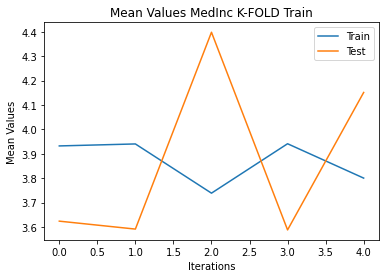

In [167]:
plot_d(a[0],a[1],"Mean Values MedInc K-FOLD Train","Iterations","Mean Values")

[1.8211220717613654,
 1.911946899654332,
 2.0079946475783874,
 1.5914760523749263,
 1.9841611383715547]

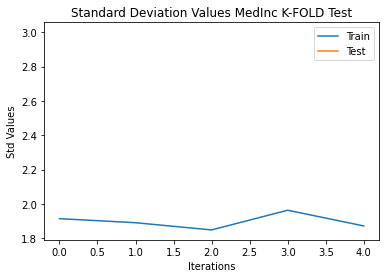

In [168]:
plot_d(a[2],[3],"Standard Deviation Values MedInc K-FOLD Test","Iterations","Std Values")
a[2] 
a[3]

In [169]:
#Iteration Plots KFOLD
HouseAge = utility_func(df,"HouseAge",kf)

HouseAge
Iteration:  1 TRAIN Mean: 28.522771317829456 TEST Mean: 29.106346899224807
Iteration:  1 TRAIN Std: 12.547098448863148 TEST Std: 12.729067240988138
Iteration:  2 TRAIN Mean: 26.8484132751938 TEST Mean: 35.803779069767444
Iteration:  2 TRAIN Std: 12.59113607083273 TEST Std: 9.679790435507165
Iteration:  3 TRAIN Mean: 29.624878875968992 TEST Mean: 24.697916666666668
Iteration:  3 TRAIN Std: 12.677282596030123 TEST Std: 11.390318306469227
Iteration:  4 TRAIN Mean: 28.92405523255814 TEST Mean: 27.501211240310077
Iteration:  4 TRAIN Std: 12.126977354253121 TEST Std: 14.218073745012324
Iteration:  5 TRAIN Mean: 29.277313468992247 TEST Mean: 26.088178294573645
Iteration:  5 TRAIN Std: 12.789323073029019 TEST Std: 11.384654024168062


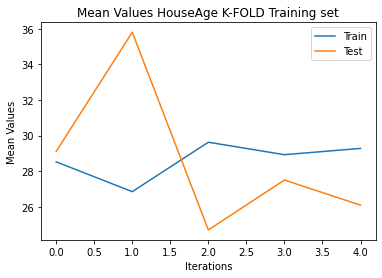

In [170]:
#House age TRAINING SET
plot_d(HouseAge[0],HouseAge[1],"Mean Values HouseAge K-FOLD Training set","Iterations","Mean Values")

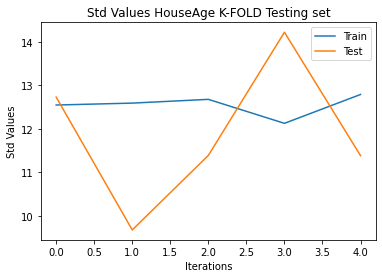

In [171]:
plot_d(HouseAge[2],HouseAge[3],"Std Values HouseAge K-FOLD Testing set","Iterations","Std Values")

In [172]:
AveRooms = utility_func(df,"AveRooms",kf)

AveRooms
Iteration:  1 TRAIN Mean: 5.373039100299663 TEST Mean: 5.652842309753225
Iteration:  1 TRAIN Std: 1.990115165691581 TEST Std: 3.834819060697032
Iteration:  2 TRAIN Mean: 5.61816253331057 TEST Mean: 4.672348577709596
Iteration:  2 TRAIN Std: 2.6660406651532536 TEST Std: 1.208930948834807
Iteration:  3 TRAIN Mean: 5.3388806346924484 TEST Mean: 5.789476172182085
Iteration:  3 TRAIN Std: 2.421214749819859 TEST Std: 2.6453248337536244
Iteration:  4 TRAIN Mean: 5.42040707649649 TEST Mean: 5.46337040496592
Iteration:  4 TRAIN Std: 2.5633130032170484 TEST Std: 2.0796752740250857
Iteration:  5 TRAIN Mean: 5.394509366152706 TEST Mean: 5.566961246341054
Iteration:  5 TRAIN Std: 2.656792577932274 TEST Std: 1.5331278743686936


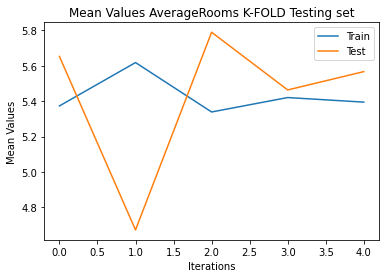

In [173]:
plot_d(AveRooms[0],AveRooms[1],"Mean Values AverageRooms K-FOLD Testing set","Iterations","Mean Values")

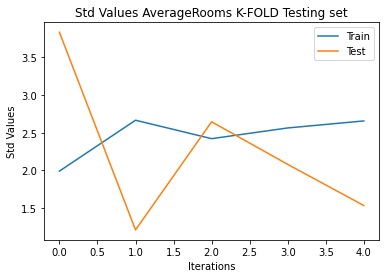

In [174]:
plot_d(AveRooms[2],AveRooms[3],"Std Values AverageRooms K-FOLD Testing set","Iterations","Std Values")

In [175]:
AveBedrms = utility_func(df,"AveBedrms",kf)

AveBedrms
Iteration:  1 TRAIN Mean: 1.0884964073612604 TEST Mean: 1.1293901185859971
Iteration:  1 TRAIN Std: 0.3405898351782151 TEST Std: 0.811016000664647
Iteration:  2 TRAIN Mean: 1.109013143791978 TEST Mean: 1.0473231728631278
Iteration:  2 TRAIN Std: 0.5275867914769331 TEST Std: 0.0808473533172089
Iteration:  3 TRAIN Mean: 1.0893319656327087 TEST Mean: 1.1260478855002045
Iteration:  3 TRAIN Std: 0.47021793282410296 TEST Std: 0.4873562657125063
Iteration:  4 TRAIN Mean: 1.0948729838583762 TEST Mean: 1.1038838125975343
Iteration:  4 TRAIN Std: 0.49370420245896257 TEST Std: 0.38465266005642673
Iteration:  5 TRAIN Mean: 1.1016612473867162 TEST Mean: 1.0767307584841754
Iteration:  5 TRAIN Std: 0.5132951721478002 TEST Std: 0.2619133045553311


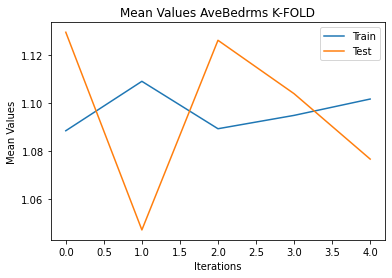

In [176]:
plot_d(AveBedrms[0],AveBedrms[1],"Mean Values AveBedrms K-FOLD","Iterations","Mean Values")

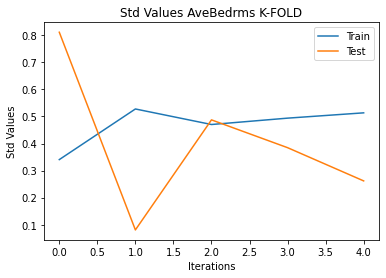

In [177]:
plot_d(AveBedrms[2],AveBedrms[3],"Std Values AveBedrms K-FOLD","Iterations","Std Values")

In [178]:
Population = utility_func(df,"Population",kf)

Population
Iteration:  1 TRAIN Mean: 1458.764898255814 TEST Mean: 1292.3241279069769
Iteration:  1 TRAIN Std: 1170.4143977564631 TEST Std: 954.438400887988
Iteration:  2 TRAIN Mean: 1412.9998183139535 TEST Mean: 1475.3844476744187
Iteration:  2 TRAIN Std: 1157.5062623242845 TEST Std: 1024.8044355189209
Iteration:  3 TRAIN Mean: 1406.4212088178294 TEST Mean: 1501.6988856589148
Iteration:  3 TRAIN Std: 1076.1320166901307 TEST Std: 1331.6339497718018
Iteration:  4 TRAIN Mean: 1411.5832122093022 TEST Mean: 1481.0508720930231
Iteration:  4 TRAIN Std: 1093.423684961203 TEST Std: 1275.3678856852944
Iteration:  5 TRAIN Mean: 1437.6145833333333 TEST Mean: 1376.9253875968993
Iteration:  5 TRAIN Std: 1160.6621011580082 TEST Std: 1010.5061708628609


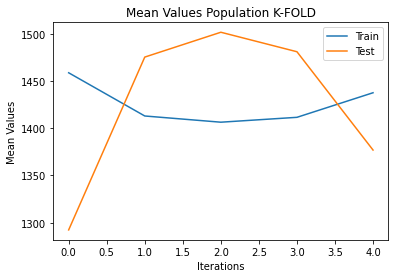

In [179]:
plot_d(Population[0],Population[1],"Mean Values Population K-FOLD","Iterations","Mean Values")

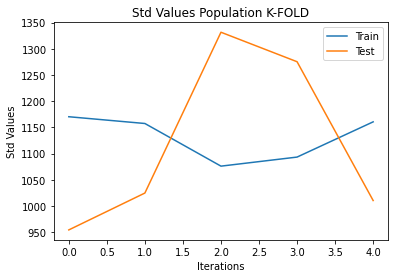

In [180]:
plot_d(Population[2],Population[3],"Std Values Population K-FOLD","Iterations","Std Values")

In [181]:
AveOccup = utility_func(df,"AveOccup",kf)

AveOccup
Iteration:  1 TRAIN Mean: 3.088484637378052 TEST Mean: 2.9993372476696654
Iteration:  1 TRAIN Std: 10.63511130353188 TEST Std: 9.324362189456497
Iteration:  2 TRAIN Mean: 3.028588291435601 TEST Mean: 3.238922631439469
Iteration:  2 TRAIN Std: 11.601270007685919 TEST Std: 0.9816201448346162
Iteration:  3 TRAIN Mean: 3.1153855178886145 TEST Mean: 2.8917337256274123
Iteration:  3 TRAIN Std: 11.574726214346565 TEST Std: 1.849355541617559
Iteration:  4 TRAIN Mean: 3.112912887600935 TEST Mean: 2.9016242467781317
Iteration:  4 TRAIN Std: 11.459899191253994 TEST Std: 3.7425033473634484
Iteration:  5 TRAIN Mean: 3.0079044628786695 TEST Mean: 3.3216579456671935
Iteration:  5 TRAIN Std: 5.133051124690576 TEST Std: 20.831800151762035


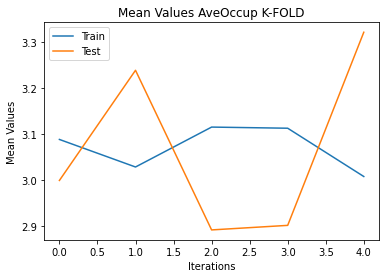

In [182]:
plot_d(AveOccup[0],AveOccup[1],"Mean Values AveOccup K-FOLD","Iterations","Mean Values")

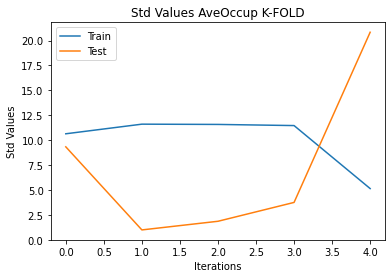

In [183]:
plot_d(AveOccup[2],AveOccup[3],"Std Values AveOccup K-FOLD","Iterations","Std Values")

In [184]:
#Monte Carlo split
from sklearn.model_selection import ShuffleSplit
Mc = ShuffleSplit(n_splits=5, test_size=.2, random_state=1)
Mc.get_n_splits(df)

5

In [185]:
aMc = utility_func(df,"MedInc",Mc)

MedInc
Iteration:  1 TRAIN Mean: 3.8761492732558143 TEST Mean: 3.848757921511628
Iteration:  1 TRAIN Std: 1.8915836238166426 TEST Std: 1.932499746392949
Iteration:  2 TRAIN Mean: 3.8817297722868216 TEST Mean: 3.826435925387597
Iteration:  2 TRAIN Std: 1.909832788947366 TEST Std: 1.8588082182156918
Iteration:  3 TRAIN Mean: 3.867737457606589 TEST Mean: 3.8824051841085274
Iteration:  3 TRAIN Std: 1.883528635650232 TEST Std: 1.9638328675209054
Iteration:  4 TRAIN Mean: 3.8657175145348837 TEST Mean: 3.8904849563953485
Iteration:  4 TRAIN Std: 1.8859534607407133 TEST Std: 1.9544187994933144
Iteration:  5 TRAIN Mean: 3.880594513081395 TEST Mean: 3.830976962209302
Iteration:  5 TRAIN Std: 1.904522456526416 TEST Std: 1.880606608382752


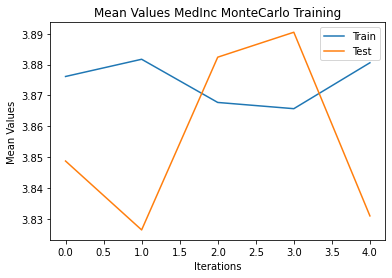

In [186]:
plot_d(aMc[0],aMc[1],"Mean Values MedInc MonteCarlo Training","Iterations","Mean Values")

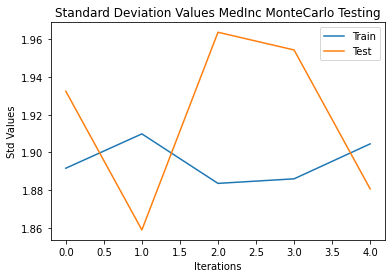

In [187]:
plot_d(aMc[2],aMc[3],"Standard Deviation Values MedInc MonteCarlo Testing","Iterations","Std Values")

In [188]:
#MonteCarlo Split
HouseAgeMc = utility_func(df,"HouseAge",Mc)

HouseAge
Iteration:  1 TRAIN Mean: 28.604469476744185 TEST Mean: 28.779554263565892
Iteration:  1 TRAIN Std: 12.58604637649294 TEST Std: 12.58415234837359
Iteration:  2 TRAIN Mean: 28.6547359496124 TEST Mean: 28.578488372093023
Iteration:  2 TRAIN Std: 12.603211229520364 TEST Std: 12.516028683924715
Iteration:  3 TRAIN Mean: 28.64983042635659 TEST Mean: 28.598110465116278
Iteration:  3 TRAIN Std: 12.581867622131135 TEST Std: 12.601747422701171
Iteration:  4 TRAIN Mean: 28.71547965116279 TEST Mean: 28.33551356589147
Iteration:  4 TRAIN Std: 12.566550654361201 TEST Std: 12.658266914442006
Iteration:  5 TRAIN Mean: 28.643410852713178 TEST Mean: 28.623788759689923
Iteration:  5 TRAIN Std: 12.611617590767459 TEST Std: 12.48227960275551


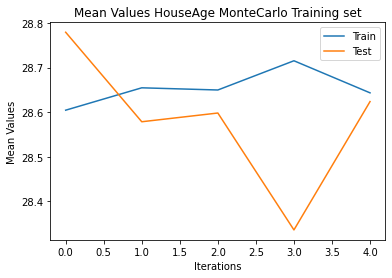

In [189]:
plot_d(HouseAgeMc[0],HouseAgeMc[1],"Mean Values HouseAge MonteCarlo Training set","Iterations","Mean Values")

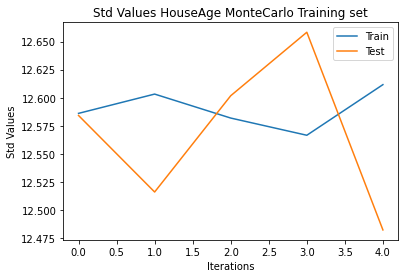

In [190]:
plot_d(HouseAgeMc[2],HouseAgeMc[3],"Std Values HouseAge MonteCarlo Training set","Iterations","Std Values")

In [191]:
# I will stop the plots here pretty much, its the same process as above. Just use the two utility functions. 

In [192]:
# Leave one Out 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(df)

20640

In [193]:
# For leaveone Out the plots are going to be many so i will not attempt to make plots for every Iteration. 

In [163]:
HouseAgeloo = utility_func(df,"HouseAge",loo)

HouseAge
Iteration:  1 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  1 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  2 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  2 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  3 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  3 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  6 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  6 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  7 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  7 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  8 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  8 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  9 TRAIN Mean: 28.63883909104

Iteration:  78 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  78 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  79 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  79 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  80 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  80 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  81 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  81 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  82 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  82 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  83 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  83 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  84 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  84 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  85 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  85 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  86 TRAIN Mean: 28.63835

Iteration:  155 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  156 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  156 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  157 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  157 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  158 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  158 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  159 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  159 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  160 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  160 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  161 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  161 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  162 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  162 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  163 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  163 

Iteration:  235 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  235 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  236 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  236 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  237 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  237 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  238 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  238 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  239 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  239 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  240 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  240 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  241 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  241 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  242 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  242 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  243 TRAIN 

Iteration:  311 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  312 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  312 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  313 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  313 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  314 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  314 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  315 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  315 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  316 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  316 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  317 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  317 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  318 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  318 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  319 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  319 TRAIN 

Iteration:  387 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  387 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  388 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  388 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  389 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  389 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  390 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  390 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  391 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  391 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  392 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  392 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  393 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  393 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  394 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  394 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  395 TRAI

Iteration:  465 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  465 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  466 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  466 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  467 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  467 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  468 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  468 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  469 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  469 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  470 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  470 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  471 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  471 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  472 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  472 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  473 TRA

Iteration:  541 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  541 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  542 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  542 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  543 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  543 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  544 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  544 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  545 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  545 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  546 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  546 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  547 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  547 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  548 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  548 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  549 TR

Iteration:  623 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  623 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  624 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  624 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  625 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  625 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  626 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  626 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  627 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  627 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  628 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  628 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  629 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  629 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  630 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  630 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  631 TRAIN 

Iteration:  697 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  697 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  698 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  698 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  699 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  699 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  700 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  700 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  701 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  701 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  702 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  702 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  703 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  703 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  704 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  704 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  705 TRAIN M

Iteration:  773 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  774 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  774 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  775 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  775 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  776 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  776 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  777 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  777 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  778 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  778 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  779 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  779 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  780 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  780 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  781 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  781 TR

Iteration:  853 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  853 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  854 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  854 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  855 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  855 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  856 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  856 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  857 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  857 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  858 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  858 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  859 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  859 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  860 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  860 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  861 TRAIN M

Iteration:  931 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  931 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  932 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  932 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  933 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  933 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  934 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  934 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  935 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  935 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  936 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  936 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  937 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  937 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  938 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  938 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  939 TRA

Iteration:  1007 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  1008 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  1008 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  1009 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  1009 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  1010 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  1010 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  1011 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  1011 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  1012 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  1012 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  1013 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  1013 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  1014 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1014 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1015 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Itera

Iteration:  1083 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1083 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1084 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1084 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1085 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1085 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1086 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1086 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1087 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  1087 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  1088 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1088 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1089 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  1089 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  1090 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  1090 TRAIN Std: 12.585825917684291 TEST Std: nan
It

Iteration:  1160 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  1160 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  1161 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  1161 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  1162 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  1162 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  1163 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  1163 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  1164 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  1164 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  1165 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  1165 TRAIN Std: 12.58514093706262 TEST Std: nan
Iteration:  1166 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  1166 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  1167 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  1167 TRAIN Std: 12.58521355561909 TEST Std: nan
Iter

Iteration:  1234 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1234 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1235 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1235 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1236 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  1236 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  1237 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1237 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1238 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1238 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1239 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1239 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1240 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1240 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1241 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  1241 TRAIN Std: 12.585263526395188 TEST Std: nan
I

Iteration:  1309 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  1309 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  1310 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  1310 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  1311 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1311 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1312 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  1312 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  1313 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  1313 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  1314 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  1314 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  1315 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1315 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1316 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  1316 TRAIN Std: 12.58564460645125 TEST Std: nan
Iterat

Iteration:  1385 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  1386 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1386 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1387 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  1387 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  1388 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  1388 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  1389 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  1389 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  1390 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  1390 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  1391 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  1391 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  1392 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  1392 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  1393 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iterati

Iteration:  1463 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  1463 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  1464 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  1464 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  1465 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  1465 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  1466 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  1466 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  1467 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  1467 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  1468 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  1468 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  1469 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  1469 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  1470 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  1470 TRAIN Std: 12.585449949127666 TEST Std: nan
Iterat

Iteration:  1539 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  1539 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  1540 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  1540 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  1541 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  1541 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  1542 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  1542 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  1543 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  1543 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  1544 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  1544 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  1545 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  1545 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  1546 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  1546 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration

Iteration:  1618 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  1619 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  1619 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  1620 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  1620 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  1621 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  1621 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  1622 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  1622 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  1623 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  1623 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  1624 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  1624 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  1625 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  1625 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  1626 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteratio

Iteration:  1696 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  1697 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  1697 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  1698 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  1698 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  1699 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  1699 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  1700 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  1700 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  1701 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1701 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1702 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  1702 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  1703 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  1703 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  1704 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iterat

Iteration:  1767 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  1768 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  1768 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  1769 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  1769 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  1770 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  1770 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  1771 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  1771 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  1772 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  1772 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  1773 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  1773 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  1774 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  1774 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  1775 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration: 

Iteration:  1840 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  1841 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  1841 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  1842 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  1842 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  1843 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  1843 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  1844 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1844 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1845 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  1845 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  1846 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  1846 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  1847 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1847 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1848 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iter

Iteration:  1915 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  1915 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  1916 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  1916 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  1917 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  1917 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  1918 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  1918 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  1919 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  1919 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  1920 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  1920 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  1921 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  1921 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  1922 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  1922 TRAIN Std: 12.585263526395188 TEST Std: nan
Ite

Iteration:  1991 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  1991 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  1992 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  1992 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  1993 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  1993 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  1994 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  1994 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  1995 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  1995 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  1996 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  1996 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  1997 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  1997 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  1998 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  1998 TRAIN Std: 12.585347240748856 TEST Std: nan
Iterati

Iteration:  2067 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  2067 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  2068 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  2068 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  2069 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  2069 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  2070 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  2070 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  2071 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  2071 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2072 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  2072 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  2073 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  2073 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  2074 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  2074 TRAIN Std: 12.585504389035743 TEST Std: nan
Itera

Iteration:  2141 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2142 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  2142 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  2143 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  2143 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  2144 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  2144 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  2145 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  2145 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  2146 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  2146 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  2147 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  2147 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  2148 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  2148 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  2149 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Itera

Iteration:  2219 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  2219 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  2220 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2220 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2221 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  2221 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  2222 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2222 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2223 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  2223 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  2224 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  2224 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  2225 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  2225 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  2226 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  2226 TRAIN Std: 12.58564460645125 TEST Std: nan
Iterat

Iteration:  2295 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  2295 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  2296 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  2296 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  2297 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  2297 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  2298 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  2298 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  2299 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  2299 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  2300 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2300 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2301 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  2301 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  2302 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  2302 TRAIN Std: 12.585837021778053 TEST Std: nan
Ite

Iteration:  2375 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  2376 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  2376 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  2377 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  2377 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  2378 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  2378 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  2379 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  2379 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2380 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  2380 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  2381 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  2381 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  2382 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  2382 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  2383 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteratio

Iteration:  2451 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  2451 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  2452 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  2452 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  2453 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  2453 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  2454 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  2454 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  2455 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  2455 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  2456 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  2456 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2457 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  2457 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2458 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  2458 TRAIN Std: 12.585858957408213 TEST Std: nan
Iterati

Iteration:  2526 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  2527 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  2527 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  2528 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  2528 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  2529 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  2529 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  2530 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2530 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2531 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  2531 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  2532 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  2532 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  2533 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  2533 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  2534 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iterati

Iteration:  2600 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  2600 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  2601 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  2601 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  2602 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  2602 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  2603 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2603 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2604 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  2604 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  2605 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  2605 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  2606 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  2606 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  2607 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  2607 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteratio

Iteration:  2679 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  2679 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  2680 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  2680 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  2681 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  2681 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  2682 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  2682 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  2683 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  2683 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  2684 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2684 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2685 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  2685 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  2686 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  2686 TRAIN Std: 12.585568404719371 TEST Std: nan
Itera

Iteration:  2757 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  2757 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  2758 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  2758 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  2759 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  2759 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  2760 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  2760 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  2761 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  2761 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  2762 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  2762 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  2763 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  2763 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  2764 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  2764 TRAIN Std: 12.585504389035743 TEST Std: nan
Iterati

Iteration:  2837 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  2837 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  2838 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  2838 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  2839 TRAIN Mean: 28.638403023402297 TEST Mean: 51.0
Iteration:  2839 TRAIN Std: 12.58489997661637 TEST Std: nan
Iteration:  2840 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  2840 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  2841 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  2841 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  2842 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  2842 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  2843 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  2843 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  2844 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  2844 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration

Iteration:  2915 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  2915 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  2916 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  2916 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  2917 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  2917 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  2918 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  2918 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  2919 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  2919 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  2920 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  2920 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  2921 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  2921 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  2922 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  2922 TRAIN Std: 12.58514093706262 TEST Std: nan
Iteratio

Iteration:  2990 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  2990 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  2991 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  2991 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  2992 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  2992 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  2993 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  2993 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  2994 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  2994 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  2995 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  2995 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  2996 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  2996 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  2997 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  2997 TRAIN Std: 12.585263526395188 TEST Std: nan
Iter

Iteration:  3067 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  3067 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  3068 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3068 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3069 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3069 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3070 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3070 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3071 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  3071 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  3072 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3072 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3073 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  3073 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  3074 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  3074 TRAIN Std: 12.585851794266587 TEST Std: nan
Itera

Iteration:  3143 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  3144 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  3144 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  3145 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  3145 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  3146 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3146 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  3147 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  3147 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  3148 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  3148 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  3149 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  3149 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  3150 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  3150 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  3151 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:

Iteration:  3220 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  3221 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  3221 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  3222 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  3222 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  3223 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  3223 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  3224 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  3224 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  3225 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  3225 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  3226 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  3226 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  3227 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  3227 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  3228 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Itera

Iteration:  3297 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  3297 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  3298 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  3298 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  3299 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  3299 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  3300 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  3300 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  3301 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  3301 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  3302 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  3302 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  3303 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  3303 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  3304 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  3304 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteratio

Iteration:  3372 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  3372 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  3373 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3373 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3374 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  3374 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  3375 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  3375 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  3376 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3376 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3377 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3377 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  3378 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  3378 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  3379 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  3379 TRAIN Std: 12.585042447915429 TEST Std: nan
Iterati

Iteration:  3447 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  3447 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  3448 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  3448 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  3449 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3449 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3450 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3450 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3451 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  3451 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  3452 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  3452 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  3453 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  3453 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  3454 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3454 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration

Iteration:  3523 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3523 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3524 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3524 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3525 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3525 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3526 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3526 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3527 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3527 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3528 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3528 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3529 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  3529 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  3530 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  3530 TRAIN Std: 12.58564460645125 TEST Std: nan
Iterat

Iteration:  3601 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  3601 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  3602 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  3602 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  3603 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  3603 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  3604 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  3604 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  3605 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3605 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3606 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  3606 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  3607 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3607 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  3608 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  3608 TRAIN Std: 12.58571883322446 TEST Std: nan
Iterat

Iteration:  3679 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3679 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3680 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3680 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3681 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3681 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3682 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3682 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  3683 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3683 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3684 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  3684 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  3685 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3685 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3686 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3686 TRAIN Std: 12.585758226858616 TEST Std: nan
Iterati

Iteration:  3756 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  3757 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  3757 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  3758 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  3758 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  3759 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3759 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3760 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  3760 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  3761 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  3761 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  3762 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  3762 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  3763 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  3763 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  3764 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Itera

Iteration:  3833 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  3833 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  3834 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  3834 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  3835 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  3835 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  3836 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  3836 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  3837 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  3837 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  3838 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  3838 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  3839 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  3839 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  3840 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  3840 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteratio

Iteration:  3910 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  3910 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  3911 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  3911 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  3912 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  3912 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  3913 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  3913 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  3914 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  3914 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  3915 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  3915 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  3916 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  3916 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  3917 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  3917 TRAIN Std: 12.585727962916835 TEST Std: nan
Iterat

Iteration:  3986 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3986 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3987 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3987 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3988 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  3988 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  3989 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  3989 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  3990 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  3990 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  3991 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  3991 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  3992 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  3992 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  3993 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  3993 TRAIN Std: 12.585849109090056 TEST Std: nan
It

Iteration:  4064 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  4064 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  4065 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  4065 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  4066 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  4066 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  4067 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4067 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4068 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4068 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4069 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4069 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  4070 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4070 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4071 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4071 TRAIN Std: 12.585851794266587 TEST Std: nan
Iter

Iteration:  4142 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4142 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4143 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4143 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4144 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  4144 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  4145 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  4145 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  4146 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  4146 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  4147 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4147 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4148 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4148 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4149 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4149 TRAIN Std: 12.584811954629567 TEST Std: nan
Ite

Iteration:  4221 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4221 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4222 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4222 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4223 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4223 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4224 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4224 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4225 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4225 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4226 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  4226 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  4227 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  4227 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  4228 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4228 TRAIN Std: 12.585465523637529 TEST Std: nan
Ite

Iteration:  4298 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4299 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  4299 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  4300 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  4300 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  4301 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  4301 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  4302 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  4302 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  4303 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4303 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4304 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  4304 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  4305 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  4305 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  4306 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Itera

Iteration:  4374 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4374 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4375 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  4375 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  4376 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  4376 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  4377 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  4377 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  4378 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  4378 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  4379 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4379 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4380 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4380 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4381 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4381 TRAIN Std: 12.584811954629567 TEST Std: nan
It

Iteration:  4450 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4450 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  4451 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  4451 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  4452 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  4452 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  4453 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  4453 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  4454 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  4454 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  4455 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  4455 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  4456 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  4456 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  4457 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  4457 TRAIN Std: 12.585614069702974 TEST Std: nan
Iterat

Iteration:  4525 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  4526 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4526 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4527 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4527 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4528 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  4528 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  4529 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4529 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4530 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  4530 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  4531 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4531 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4532 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4532 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4533 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iterati

Iteration:  4594 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  4595 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  4595 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  4596 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4596 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  4597 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  4597 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  4598 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  4598 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  4599 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  4599 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  4600 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  4600 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  4601 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  4601 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  4602 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Ite

Iteration:  4666 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4666 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  4667 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4667 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4668 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  4668 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  4669 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  4669 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  4670 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  4670 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  4671 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  4671 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  4672 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  4672 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  4673 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4673 TRAIN Std: 12.585851794266587 TEST Std: nan
Iter

Iteration:  4744 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  4744 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  4745 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  4745 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  4746 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  4746 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  4747 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  4747 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  4748 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  4748 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  4749 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4749 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4750 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4750 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4751 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  4751 TRAIN Std: 12.58565588437209 TEST Std: nan
Iterati

Iteration:  4822 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  4823 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  4823 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  4824 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  4824 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  4825 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  4825 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  4826 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  4826 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  4827 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  4827 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  4828 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  4828 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  4829 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4829 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4830 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iter

Iteration:  4899 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4899 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4900 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  4900 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  4901 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  4901 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  4902 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4902 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4903 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  4903 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  4904 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  4904 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  4905 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  4905 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  4906 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  4906 TRAIN Std: 12.58521355561909 TEST Std: nan
Iterat

Iteration:  4976 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  4977 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  4977 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  4978 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  4978 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  4979 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  4979 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  4980 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4980 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4981 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  4981 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  4982 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4982 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4983 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  4983 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  4984 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Ite

Iteration:  5055 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  5055 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5056 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  5056 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  5057 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  5057 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  5058 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  5058 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  5059 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  5059 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  5060 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  5060 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  5061 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  5061 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  5062 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  5062 TRAIN Std: 12.585784640618215 TEST Std: nan
Itera

Iteration:  5133 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5133 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  5134 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5134 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5135 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  5135 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5136 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5136 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5137 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5137 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5138 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5138 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5139 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  5139 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  5140 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5140 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration

Iteration:  5209 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  5209 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  5210 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  5210 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  5211 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5211 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  5212 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5212 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  5213 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5213 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5214 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5214 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5215 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  5215 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5216 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5216 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteratio

Iteration:  5288 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  5288 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  5289 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  5289 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  5290 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  5290 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  5291 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5291 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5292 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5292 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5293 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  5293 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  5294 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  5294 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  5295 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  5295 TRAIN Std: 12.585849109090056 TEST Std: nan
Iterati

Iteration:  5367 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  5367 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5368 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5368 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  5369 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5369 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  5370 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  5370 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  5371 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  5371 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  5372 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  5372 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  5373 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5373 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5374 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  5374 TRAIN Std: 12.585758226858616 TEST Std: nan
Iterati

Iteration:  5442 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5443 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5443 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  5444 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  5444 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  5445 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  5445 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  5446 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  5446 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  5447 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  5447 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  5448 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  5448 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  5449 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  5449 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  5450 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iterati

Iteration:  5519 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  5519 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  5520 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  5520 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  5521 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5521 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5522 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5522 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5523 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5523 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5524 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  5524 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  5525 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5525 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  5526 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  5526 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:

Iteration:  5595 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  5595 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  5596 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  5596 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  5597 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  5597 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  5598 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  5598 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  5599 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  5599 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  5600 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  5600 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  5601 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5601 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  5602 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  5602 TRAIN Std: 12.585693848765096 TEST Std: nan
Iterati

Iteration:  5663 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  5663 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  5664 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5664 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5665 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5665 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5666 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  5666 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  5667 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  5667 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  5668 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  5668 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  5669 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  5669 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  5670 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  5670 TRAIN Std: 12.585614069702974 TEST Std: nan
Ite

Iteration:  5740 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5740 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5741 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5741 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5742 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5742 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5743 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  5743 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  5744 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  5744 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  5745 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  5745 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  5746 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  5746 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  5747 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  5747 TRAIN Std: 12.58571883322446 TEST Std: nan
Itera

Iteration:  5816 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  5816 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  5817 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  5817 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  5818 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5818 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5819 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  5819 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  5820 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  5820 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  5821 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  5821 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  5822 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  5822 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  5823 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  5823 TRAIN Std: 12.585851794266587 TEST Std: nan
Itera

Iteration:  5893 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  5893 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  5894 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  5894 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  5895 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  5895 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  5896 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  5896 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  5897 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  5897 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  5898 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  5898 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  5899 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  5899 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  5900 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  5900 TRAIN Std: 12.585727962916835 TEST Std: nan
Iterat

Iteration:  5966 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  5967 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  5967 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  5968 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  5968 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  5969 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  5969 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  5970 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  5970 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  5971 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  5971 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  5972 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  5972 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  5973 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  5973 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  5974 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iterat

Iteration:  6041 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6042 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  6042 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  6043 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  6043 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  6044 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  6044 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  6045 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  6045 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  6046 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6046 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6047 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  6047 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  6048 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6048 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6049 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Itera

Iteration:  6113 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  6113 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  6114 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  6114 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  6115 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  6115 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  6116 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6116 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6117 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6117 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6118 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6118 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6119 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6119 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6120 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6120 TRAIN Std: 12.58551888937937 TEST Std: nan
Iterati

Iteration:  6190 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  6190 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  6191 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6191 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6192 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6192 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6193 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6193 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6194 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6194 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6195 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  6195 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  6196 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  6196 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  6197 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6197 TRAIN Std: 12.585784640618215 TEST Std: nan
Iterat

Iteration:  6257 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6257 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6258 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6258 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6259 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6259 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6260 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6260 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6261 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6261 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6262 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6262 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6263 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6263 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6264 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6264 TRAIN Std: 12.58580720421987 TEST Std: nan
Ite

Iteration:  6323 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  6323 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  6324 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  6324 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  6325 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  6325 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  6326 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6326 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6327 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6327 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6328 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6328 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6329 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  6329 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  6330 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  6330 TRAIN Std: 12.585504389035743 TEST Std: nan
Itera

Iteration:  6391 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  6392 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  6392 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  6393 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  6393 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  6394 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  6394 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  6395 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6395 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6396 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  6396 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  6397 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  6397 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  6398 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  6398 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  6399 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteratio

Iteration:  6462 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  6463 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6463 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6464 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  6464 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  6465 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  6465 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  6466 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  6466 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  6467 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6467 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6468 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  6468 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  6469 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6469 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6470 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iterati

Iteration:  6540 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6540 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6541 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  6541 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  6542 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6542 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6543 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6543 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6544 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  6544 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  6545 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6545 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6546 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6546 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6547 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6547 TRAIN Std: 12.585758226858616 TEST Std: nan
Iterat

Iteration:  6610 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  6610 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  6611 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  6611 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  6612 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  6612 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  6613 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  6613 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  6614 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  6614 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  6615 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6615 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6616 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  6616 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  6617 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  6617 TRAIN Std: 12.584984147633222 TEST Std: nan
Itera

Iteration:  6687 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  6688 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6688 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6689 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  6689 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  6690 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  6690 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  6691 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  6691 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  6692 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6692 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6693 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6693 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6694 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6694 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6695 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iter

Iteration:  6760 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  6760 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  6761 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6761 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  6762 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  6762 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  6763 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  6763 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  6764 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  6764 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  6765 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  6765 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  6766 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  6766 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  6767 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  6767 TRAIN Std: 12.585821084356182 TEST Std: nan
Iterat

Iteration:  6826 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  6827 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6827 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6828 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  6828 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  6829 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  6829 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  6830 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  6830 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  6831 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6831 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6832 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  6832 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  6833 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  6833 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  6834 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Itera

Iteration:  6898 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  6898 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  6899 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  6899 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  6900 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  6900 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  6901 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  6901 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  6902 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  6902 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  6903 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  6903 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  6904 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  6904 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  6905 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  6905 TRAIN Std: 12.585727962916835 TEST Std: nan
Iter

Iteration:  6973 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  6973 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  6974 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  6974 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  6975 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  6975 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  6976 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  6976 TRAIN Std: 12.585837021778053 TEST Std: nan
Iteration:  6977 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  6977 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  6978 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  6978 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  6979 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  6979 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  6980 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  6980 TRAIN Std: 12.58580720421987 TEST Std: nan
Iterat

Iteration:  7052 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7053 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  7053 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  7054 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  7054 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  7055 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7055 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7056 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7056 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  7057 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7057 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7058 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7058 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7059 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7059 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7060 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Ite

Iteration:  7119 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7120 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7120 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7121 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7121 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7122 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7122 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7123 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  7123 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  7124 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7124 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7125 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7125 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7126 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7126 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7127 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iterati

Iteration:  7191 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  7191 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  7192 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  7192 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  7193 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  7193 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  7194 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  7194 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  7195 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  7195 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  7196 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  7196 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  7197 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  7197 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  7198 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7198 TRAIN Std: 12.585727962916835 TEST Std: nan
Itera

Iteration:  7261 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7261 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  7262 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7262 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  7263 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7263 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7264 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7264 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  7265 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  7265 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  7266 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  7266 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  7267 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  7267 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  7268 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7268 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration

Iteration:  7327 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  7328 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  7328 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  7329 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  7329 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  7330 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7330 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7331 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  7331 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  7332 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7332 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7333 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7333 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  7334 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7334 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7335 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Ite

Iteration:  7398 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7398 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7399 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  7399 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  7400 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7400 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  7401 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7401 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7402 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7402 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  7403 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  7403 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  7404 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  7404 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  7405 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7405 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration: 

Iteration:  7470 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  7471 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7471 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7472 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7472 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7473 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7473 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  7474 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7474 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7475 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  7475 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  7476 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  7476 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  7477 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7477 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7478 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Itera

Iteration:  7539 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  7539 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  7540 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  7540 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  7541 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  7541 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  7542 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  7542 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  7543 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7543 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7544 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  7544 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  7545 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7545 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7546 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7546 TRAIN Std: 12.585858957408213 TEST Std: nan
I

Iteration:  7606 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7606 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  7607 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7607 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7608 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7608 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  7609 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  7609 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  7610 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7610 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7611 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7611 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  7612 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7612 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7613 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7613 TRAIN Std: 12.585784640618215 TEST Std: nan
Iterat

Iteration:  7675 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7675 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7676 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7676 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7677 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7677 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7678 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  7678 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  7679 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  7679 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  7680 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  7680 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  7681 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7681 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7682 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7682 TRAIN Std: 12.585758226858616 TEST Std: nan
Itera

Iteration:  7750 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  7750 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  7751 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  7751 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  7752 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  7752 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  7753 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7753 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  7754 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  7754 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  7755 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  7755 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  7756 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7756 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7757 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7757 TRAIN Std: 12.585784640618215 TEST Std: nan
It

Iteration:  7829 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  7829 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  7830 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7830 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7831 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  7831 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  7832 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  7832 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  7833 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  7833 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  7834 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  7834 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  7835 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7835 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  7836 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  7836 TRAIN Std: 12.585784640618215 TEST Std: nan
Itera

Iteration:  7908 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  7908 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  7909 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  7909 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  7910 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  7910 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  7911 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  7911 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  7912 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  7912 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  7913 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  7913 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  7914 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  7914 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  7915 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  7915 TRAIN Std: 12.585858957408213 TEST Std: nan
Itera

Iteration:  7982 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  7982 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  7983 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  7983 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  7984 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  7984 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  7985 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  7985 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  7986 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  7986 TRAIN Std: 12.585849109090056 TEST Std: nan
Iteration:  7987 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  7987 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  7988 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  7988 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  7989 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  7989 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration

Iteration:  8058 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  8059 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  8059 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  8060 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8060 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8061 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  8061 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  8062 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8062 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8063 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8063 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8064 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  8064 TRAIN Std: 12.585465523637529 TEST Std: nan
Iteration:  8065 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  8065 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  8066 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Itera

Iteration:  8135 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  8136 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  8136 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  8137 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  8137 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  8138 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  8138 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  8139 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8139 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8140 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8140 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8141 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8141 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8142 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8142 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8143 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration: 

Iteration:  8211 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8212 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  8212 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  8213 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  8213 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  8214 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  8214 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  8215 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  8215 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  8216 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  8216 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  8217 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  8217 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  8218 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  8218 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  8219 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iterati

Iteration:  8287 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  8287 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  8288 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  8288 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  8289 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  8289 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  8290 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  8290 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  8291 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  8291 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  8292 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8292 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8293 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8293 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8294 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  8294 TRAIN Std: 12.584811954629567 TEST Std: nan
Iterati

Iteration:  8366 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  8366 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  8367 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  8367 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  8368 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8368 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8369 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  8369 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  8370 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  8370 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  8371 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  8371 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  8372 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  8372 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  8373 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  8373 TRAIN Std: 12.585858957408213 TEST Std: nan
Ite

Iteration:  8444 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  8444 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  8445 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  8445 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  8446 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8446 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8447 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8447 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8448 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  8448 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  8449 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8449 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8450 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  8450 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  8451 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  8451 TRAIN Std: 12.585851794266587 TEST Std: nan
Iter

Iteration:  8520 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  8520 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  8521 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  8521 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  8522 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  8522 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  8523 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  8523 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  8524 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8524 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8525 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8525 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8526 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  8526 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  8527 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  8527 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteratio

Iteration:  8596 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8596 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8597 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  8597 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  8598 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  8598 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  8599 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  8599 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  8600 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  8600 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  8601 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  8601 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  8602 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  8602 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  8603 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  8603 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration

Iteration:  8671 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  8672 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8672 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8673 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  8673 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  8674 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8674 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8675 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8675 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8676 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  8676 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  8677 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  8677 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  8678 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  8678 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  8679 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iter

Iteration:  8748 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  8748 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  8749 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8749 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8750 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  8750 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  8751 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8751 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8752 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8752 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8753 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8753 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8754 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  8754 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  8755 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  8755 TRAIN Std: 12.585861733425286 TEST Std: nan
Iterat

Iteration:  8824 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  8825 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8825 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8826 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8826 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8827 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  8827 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  8828 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  8828 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  8829 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8829 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8830 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  8830 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  8831 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  8831 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  8832 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iterat

Iteration:  8903 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  8903 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  8904 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  8904 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  8905 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  8905 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  8906 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  8906 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  8907 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  8907 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  8908 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  8908 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  8909 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  8909 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  8910 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  8910 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:

Iteration:  8981 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  8981 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  8982 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  8982 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  8983 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  8983 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  8984 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  8984 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  8985 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  8985 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  8986 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  8986 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  8987 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  8987 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  8988 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  8988 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration

Iteration:  9056 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  9057 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  9057 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  9058 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  9058 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  9059 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  9059 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  9060 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  9060 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9061 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  9061 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  9062 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9062 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9063 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  9063 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  9064 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iterati

Iteration:  9132 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  9132 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  9133 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  9133 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  9134 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  9134 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  9135 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  9135 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  9136 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  9136 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  9137 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  9137 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  9138 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  9138 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  9139 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  9139 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration

Iteration:  9207 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9207 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9208 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  9208 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  9209 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  9209 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  9210 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  9210 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  9211 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  9211 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  9212 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  9212 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  9213 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  9213 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  9214 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  9214 TRAIN Std: 12.585750171267412 TEST Std: nan
Iterat

Iteration:  9282 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9283 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  9283 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  9284 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  9284 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  9285 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  9285 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  9286 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9286 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9287 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  9287 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  9288 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  9288 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  9289 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9289 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9290 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration: 

Iteration:  9355 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  9356 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  9356 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  9357 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  9357 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  9358 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  9358 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9359 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  9359 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  9360 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  9360 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9361 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  9361 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  9362 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  9362 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  9363 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iterati

Iteration:  9426 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  9427 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  9427 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  9428 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  9428 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  9429 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  9429 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  9430 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  9430 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  9431 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  9431 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  9432 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9432 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9433 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  9433 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  9434 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iterat

Iteration:  9501 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9502 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9502 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9503 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9503 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9504 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  9504 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  9505 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  9505 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  9506 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9506 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9507 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  9507 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  9508 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9508 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  9509 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iterat

Iteration:  9578 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  9578 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  9579 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  9579 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  9580 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9580 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9581 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  9581 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  9582 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  9582 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  9583 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  9583 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  9584 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  9584 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  9585 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  9585 TRAIN Std: 12.585391658754473 TEST Std: nan
Ite

Iteration:  9652 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  9652 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  9653 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  9653 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  9654 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  9654 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  9655 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  9655 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  9656 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9656 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9657 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  9657 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  9658 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  9658 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  9659 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9659 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration

Iteration:  9727 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  9727 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  9728 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  9728 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  9729 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9729 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9730 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  9730 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  9731 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  9731 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  9732 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9732 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9733 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9733 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9734 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  9734 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration

Iteration:  9800 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9801 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  9801 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  9802 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  9802 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  9803 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  9803 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  9804 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  9804 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  9805 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  9805 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  9806 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  9806 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  9807 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  9807 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  9808 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Itera

Iteration:  9875 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9876 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  9876 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  9877 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  9877 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  9878 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  9878 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  9879 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  9879 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  9880 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  9880 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  9881 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  9881 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  9882 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9882 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9883 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iter

Iteration:  9952 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9952 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9953 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  9953 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  9954 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  9954 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  9955 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  9955 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  9956 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  9956 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  9957 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  9957 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  9958 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  9958 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  9959 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  9959 TRAIN Std: 12.585758226858616 TEST Std: nan
Iterati

Iteration:  10025 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  10026 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  10026 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  10027 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  10027 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  10028 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  10028 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  10029 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  10029 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  10030 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  10030 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  10031 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  10031 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  10032 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10032 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10033 TRAIN Mean: 28.638354571442417 TEST

Iteration:  10101 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  10102 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  10102 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  10103 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10103 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10104 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  10104 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  10105 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  10105 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  10106 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  10106 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  10107 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10107 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10108 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  10108 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  10109 TRAIN Mean: 28.640341101797567 TEST M

Iteration:  10177 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10177 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10178 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  10178 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  10179 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10179 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10180 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10180 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10181 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10181 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10182 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10182 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10183 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  10183 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  10184 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  10184 TRAIN Std: 12.58584078102865 

Iteration:  10251 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  10251 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  10252 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10252 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10253 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  10253 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  10254 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  10254 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  10255 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  10255 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  10256 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10256 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10257 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10257 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10258 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  10258 TRAIN Std: 12.585329517862657 T

Iteration:  10328 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  10328 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  10329 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  10329 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  10330 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10330 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10331 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  10331 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  10332 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  10332 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  10333 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  10333 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  10334 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  10334 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  10335 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10335 TRAIN Std: 12.584693764470861 TEST St

Iteration:  10403 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  10403 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  10404 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  10404 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  10405 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  10405 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  10406 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  10406 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  10407 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  10407 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  10408 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10408 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10409 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10409 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10410 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10410 TRAIN Std: 12.584693764470861 TEST Std: n

Iteration:  10471 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10472 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10472 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10473 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10473 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10474 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  10474 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  10475 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  10475 TRAIN Std: 12.58568364496317 TEST Std: nan
Iteration:  10476 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  10476 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  10477 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10477 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10478 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10478 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10479 TRAIN Mean: 28.64009884199816 TEST Mean:

Iteration:  10546 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  10546 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  10547 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  10547 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  10548 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  10548 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  10549 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  10549 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  10550 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10550 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10551 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10551 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10552 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10552 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10553 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10553 TRAIN Std: 12.585554978528666 TEST S

Iteration:  10619 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10620 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  10620 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  10621 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10621 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10622 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10622 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10623 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  10623 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  10624 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  10624 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  10625 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  10625 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  10626 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  10626 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  10627 TRAIN Mean: 28.640244197877806 TEST Me

Iteration:  10696 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10696 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10697 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10697 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10698 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10698 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10699 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  10699 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  10700 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10700 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10701 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  10701 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  10702 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  10702 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  10703 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  10703 TRAIN Std: 12.585849109090054 TEST S

Iteration:  10771 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  10771 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  10772 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  10772 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  10773 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  10773 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  10774 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  10774 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  10775 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10775 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10776 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10776 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10777 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  10777 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  10778 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  10778 TRAIN Std: 12.585821084356182 TE

Iteration:  10849 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  10849 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  10850 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  10850 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  10851 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  10851 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  10852 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  10852 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  10853 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10853 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10854 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  10854 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  10855 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  10855 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  10856 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  10856 TRAIN Std: 12.585042447915429 TEST S

Iteration:  10927 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  10927 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  10928 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  10928 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  10929 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  10929 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  10930 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  10930 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  10931 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  10931 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  10932 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  10932 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  10933 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  10933 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  10934 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  10934 TRAIN Std: 12.585849109090054 TE

Iteration:  11005 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11005 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11006 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  11006 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  11007 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11007 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11008 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11008 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11009 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  11009 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  11010 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  11010 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  11011 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11011 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  11012 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  11012 TRAIN Std: 12.58584078102865 TEST

Iteration:  11081 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11081 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11082 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  11082 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  11083 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  11083 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  11084 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  11084 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  11085 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  11085 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  11086 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11086 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11087 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11087 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11088 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  11088 TRAIN Std: 12.585825917684291 T

Iteration:  11157 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  11158 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  11158 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  11159 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11159 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11160 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  11160 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  11161 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  11161 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  11162 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  11162 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  11163 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  11163 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11164 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  11164 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  11165 TRAIN Mean: 28.640001938078395 TE

Iteration:  11235 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  11235 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  11236 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11236 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11237 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  11237 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  11238 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11238 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11239 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  11239 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  11240 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11240 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  11241 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  11241 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  11242 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  11242 TRAIN Std: 12.58580720421987 TE

Iteration:  11311 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  11311 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  11312 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  11312 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  11313 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  11313 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  11314 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  11314 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  11315 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  11315 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  11316 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  11316 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  11317 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11317 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11318 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  11318 TRAIN Std: 12.585777659120787 TEST St

Iteration:  11388 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  11388 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  11389 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  11389 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  11390 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  11390 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  11391 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  11391 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  11392 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  11392 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  11393 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  11393 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  11394 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  11394 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11395 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11395 TRAIN Std: 12.585683644963172 TEST S

Iteration:  11463 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11463 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  11464 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  11464 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  11465 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  11465 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  11466 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  11466 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  11467 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  11467 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  11468 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  11468 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  11469 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  11469 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  11470 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  11470 TRAIN Std: 12.584786711861986 TEST 

Iteration:  11540 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11541 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11541 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11542 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  11542 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  11543 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  11543 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11544 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11544 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11545 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  11545 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  11546 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  11546 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  11547 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  11547 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11548 TRAIN Mean: 28.639614322399343 TEST

Iteration:  11617 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  11617 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  11618 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  11618 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  11619 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11619 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  11620 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11620 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11621 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11621 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11622 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  11622 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  11623 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  11623 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  11624 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  11624 TRAIN Std: 12.58571883322446 TEST 

Iteration:  11695 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  11695 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  11696 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  11696 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  11697 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11697 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11698 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  11698 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  11699 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  11699 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  11700 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  11700 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  11701 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  11701 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  11702 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  11702 TRAIN Std: 12.585263526395188 TEST

Iteration:  11772 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  11772 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  11773 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  11773 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  11774 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  11774 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  11775 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  11775 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  11776 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  11776 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  11777 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  11777 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  11778 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  11778 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  11779 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  11779 TRAIN Std: 12.585329517862657 TES

Iteration:  11848 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  11848 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  11849 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  11849 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  11850 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  11850 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  11851 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  11851 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  11852 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  11852 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  11853 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  11853 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  11854 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  11854 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  11855 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  11855 TRAIN Std: 12.58564460645125 TEST S

Iteration:  11923 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  11924 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  11924 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  11925 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  11925 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  11926 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  11926 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  11927 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  11927 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  11928 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  11928 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  11929 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  11929 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  11930 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  11930 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  11931 TRAIN Mean: 28.639614322399343 TEST Mea

Iteration:  12004 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  12004 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  12005 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  12005 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  12006 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  12006 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  12007 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  12007 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  12008 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12008 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12009 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  12009 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  12010 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  12010 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  12011 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  12011 TRAIN Std: 12.585750171267412 TES

Iteration:  12080 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  12080 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  12081 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  12081 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  12082 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  12082 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  12083 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  12083 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  12084 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12084 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12085 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  12085 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  12086 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  12086 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  12087 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  12087 TRAIN Std: 12.585329517862657 TEST S

Iteration:  12155 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  12156 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  12156 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  12157 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  12157 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  12158 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  12158 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  12159 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  12159 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  12160 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12160 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  12161 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  12161 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  12162 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  12162 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  12163 TRAIN Mean: 28.640050390038276 TEST

Iteration:  12233 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12233 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12234 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  12234 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  12235 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  12235 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  12236 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  12236 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  12237 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  12237 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  12238 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  12238 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  12239 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  12239 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  12240 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12240 TRAIN Std: 12.585391658754473 TEST S

Iteration:  12311 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  12312 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12312 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  12313 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  12313 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  12314 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  12314 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  12315 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  12315 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  12316 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  12316 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  12317 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  12317 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  12318 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12318 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  12319 TRAIN Mean: 28.64014729395804 TEST

Iteration:  12387 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  12388 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  12388 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  12389 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  12389 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  12390 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  12390 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  12391 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  12391 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  12392 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  12392 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  12393 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  12393 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  12394 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12394 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12395 TRAIN Mean: 28.640534909637093 TEST 

Iteration:  12462 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12463 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  12463 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  12464 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  12464 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  12465 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  12465 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  12466 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  12466 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  12467 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  12467 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  12468 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  12468 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  12469 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  12469 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  12470 TRAIN Mean: 28.638548379281943 TEST Me

Iteration:  12541 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  12541 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  12542 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  12542 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  12543 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  12543 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  12544 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  12544 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  12545 TRAIN Mean: 28.638403023402297 TEST Mean: 51.0
Iteration:  12545 TRAIN Std: 12.58489997661637 TEST Std: nan
Iteration:  12546 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  12546 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  12547 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  12547 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  12548 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  12548 TRAIN Std: 12.584811954629567 TES

Iteration:  12617 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  12617 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  12618 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  12618 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  12619 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12619 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12620 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  12620 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  12621 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  12621 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  12622 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  12622 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  12623 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  12623 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  12624 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  12624 TRAIN Std: 12.584786711861986 TEST Std

Iteration:  12694 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  12694 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  12695 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  12695 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  12696 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  12696 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  12697 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12697 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12698 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  12698 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  12699 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  12699 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  12700 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  12700 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  12701 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  12701 TRAIN Std: 12.585758226858616 TES

Iteration:  12772 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  12772 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  12773 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  12773 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  12774 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  12774 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  12775 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  12775 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  12776 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  12776 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  12777 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  12777 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  12778 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  12778 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  12779 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  12779 TRAIN Std: 12.58540830744486 TEST 

Iteration:  12848 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12848 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12849 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12849 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12850 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  12850 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  12851 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12851 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12852 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  12852 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  12853 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12853 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12854 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  12854 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  12855 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  12855 TRAIN Std: 12.585614069702974 T

Iteration:  12921 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  12921 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  12922 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  12922 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  12923 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  12923 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  12924 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  12924 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  12925 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  12925 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  12926 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  12926 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  12927 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  12927 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  12928 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  12928 TRAIN Std: 12.585849109090054 T

Iteration:  12996 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  12996 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  12997 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  12997 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  12998 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12998 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  12999 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  12999 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  13000 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  13000 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  13001 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  13001 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  13002 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13002 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13003 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  13003 TRAIN Std: 12.585042447915429 TEST 

Iteration:  13071 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  13071 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  13072 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  13072 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  13073 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  13073 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  13074 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13074 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13075 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  13075 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  13076 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  13076 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  13077 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  13077 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  13078 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  13078 TRAIN Std: 12.5858622704601 TEST 

Iteration:  13148 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  13148 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  13149 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13149 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13150 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13150 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13151 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  13151 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  13152 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  13152 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  13153 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  13153 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  13154 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13154 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13155 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  13155 TRAIN Std: 12.58571883322446 TEST S

Iteration:  13219 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  13219 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  13220 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  13220 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  13221 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  13221 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  13222 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13222 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13223 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  13223 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  13224 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  13224 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  13225 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13225 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13226 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  13226 TRAIN Std: 12.58571883322446 TEST St

Iteration:  13295 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  13295 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  13296 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  13296 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  13297 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  13297 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  13298 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  13298 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  13299 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  13299 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  13300 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  13300 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  13301 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  13301 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  13302 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  13302 TRAIN Std: 12.58565588437209 TES

Iteration:  13373 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13373 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13374 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  13374 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  13375 TRAIN Mean: 28.640777169436504 TEST Mean: 2.0
Iteration:  13375 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  13376 TRAIN Mean: 28.640728717476623 TEST Mean: 3.0
Iteration:  13376 TRAIN Std: 12.584596965920479 TEST Std: nan
Iteration:  13377 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  13377 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  13378 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  13378 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  13379 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13379 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13380 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  13380 TRAIN Std: 12.585449949127666 TEST 

Iteration:  13447 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  13447 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  13448 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  13448 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  13449 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  13449 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  13450 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13450 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13451 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  13451 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  13452 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13452 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13453 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  13453 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  13454 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  13454 TRAIN Std: 12.5858622704601 TEST Std

Iteration:  13522 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  13523 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13523 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13524 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  13524 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  13525 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  13525 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  13526 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  13526 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  13527 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  13527 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  13528 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  13528 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  13529 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  13529 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  13530 TRAIN Mean: 28.640583361596978 TE

Iteration:  13600 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  13601 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  13601 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  13602 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  13602 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  13603 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  13603 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  13604 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  13604 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  13605 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  13605 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  13606 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  13606 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  13607 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13607 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13608 TRAIN Mean: 28.63980813023887 TES

Iteration:  13678 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  13679 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  13679 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  13680 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  13680 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  13681 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  13681 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  13682 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13682 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13683 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13683 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13684 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  13684 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  13685 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  13685 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  13686 TRAIN Mean: 28.639614322399343 TEST Mean:

Iteration:  13752 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  13752 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  13753 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  13753 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  13754 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  13754 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  13755 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  13755 TRAIN Std: 12.585449949127668 TEST Std: nan
Iteration:  13756 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  13756 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  13757 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13757 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13758 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  13758 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  13759 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  13759 TRAIN Std: 12.58584078102865 TEST

Iteration:  13828 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  13828 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  13829 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  13829 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  13830 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  13830 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  13831 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  13831 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  13832 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  13832 TRAIN Std: 12.58511999148745 TEST Std: nan
Iteration:  13833 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  13833 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  13834 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  13834 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  13835 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  13835 TRAIN Std: 12.585042447915429 TEST 

Iteration:  13896 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  13896 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  13897 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  13897 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  13898 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  13898 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  13899 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  13899 TRAIN Std: 12.585449949127668 TEST Std: nan
Iteration:  13900 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  13900 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  13901 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  13901 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  13902 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  13902 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  13903 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  13903 TRAIN Std: 12.585683644963172 TEST

Iteration:  13969 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  13970 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  13970 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  13971 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  13971 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  13972 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  13972 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  13973 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  13973 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  13974 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  13974 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  13975 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  13975 TRAIN Std: 12.585449949127668 TEST Std: nan
Iteration:  13976 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  13976 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  13977 TRAIN Mean: 28.64009884199816 TEST M

Iteration:  14041 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  14042 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  14042 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  14043 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  14043 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  14044 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14044 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14045 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  14045 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  14046 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14046 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14047 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14047 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14048 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  14048 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  14049 TRAIN Mean: 28.638887543001115 TEST Me

Iteration:  14119 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  14120 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14120 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14121 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  14121 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  14122 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  14122 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  14123 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14123 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14124 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  14124 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  14125 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  14125 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  14126 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  14126 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  14127 TRAIN Mean: 28.64014729395804 TEST Me

Iteration:  14195 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  14196 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  14196 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  14197 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  14197 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  14198 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  14198 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  14199 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  14199 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  14200 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  14200 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  14201 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  14201 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  14202 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14202 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14203 TRAIN Mean: 28.639662774359223 TEST 

Iteration:  14270 TRAIN Std: 12.58528232349346 TEST Std: nan
Iteration:  14271 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  14271 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  14272 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  14272 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  14273 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  14273 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  14274 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  14274 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  14275 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  14275 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  14276 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  14276 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  14277 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  14277 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  14278 TRAIN Mean: 28.639178254760406 TEST Me

Iteration:  14350 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  14351 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  14351 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  14352 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  14352 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  14353 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  14353 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  14354 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14354 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  14355 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  14355 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  14356 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14356 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  14357 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  14357 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  14358 TRAIN Mean: 28.638354571442417 TES

Iteration:  14429 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  14429 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  14430 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  14430 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  14431 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  14431 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  14432 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  14432 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  14433 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  14433 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  14434 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  14434 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  14435 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  14435 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  14436 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14436 TRAIN Std: 12.585849109090054 TES

Iteration:  14507 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  14507 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  14508 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  14508 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  14509 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  14509 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  14510 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  14510 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  14511 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  14511 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  14512 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  14512 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  14513 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  14513 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  14514 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  14514 TRAIN Std: 12.585193684291488 TEST St

Iteration:  14586 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14586 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14587 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14587 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14588 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  14588 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  14589 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14589 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14590 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14590 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14591 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  14591 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  14592 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  14592 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  14593 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  14593 TRAIN Std: 12.585750171267412

Iteration:  14662 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  14662 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  14663 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  14663 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  14664 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  14664 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  14665 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14665 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  14666 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  14666 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  14667 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14667 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14668 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14668 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14669 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14669 TRAIN Std: 12.585784640618215 T

Iteration:  14737 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  14738 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  14738 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  14739 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14739 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  14740 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  14740 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  14741 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  14741 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  14742 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  14742 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  14743 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  14743 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  14744 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  14744 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  14745 TRAIN Mean: 28.64009884199816 TEST

Iteration:  14814 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  14814 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  14815 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  14815 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  14816 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  14816 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  14817 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  14817 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  14818 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  14818 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  14819 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  14819 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  14820 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  14820 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  14821 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  14821 TRAIN Std: 12.585282323493459 TEST

Iteration:  14889 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  14890 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  14890 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  14891 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  14891 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  14892 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  14892 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  14893 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  14893 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  14894 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  14894 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  14895 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  14895 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  14896 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  14896 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  14897 TRAIN Mean: 28.640001938078395 TEST M

Iteration:  14963 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  14964 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  14964 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  14965 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  14965 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  14966 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  14966 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  14967 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  14967 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  14968 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  14968 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  14969 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  14969 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  14970 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  14970 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  14971 TRAIN Mean: 28.639372062599932 TEST

Iteration:  15038 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  15038 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  15039 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  15039 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  15040 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  15040 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  15041 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  15041 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  15042 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  15042 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  15043 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  15043 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  15044 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  15044 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  15045 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  15045 TRAIN Std: 12.585504389035743 TE

Iteration:  15113 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  15113 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  15114 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  15114 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  15115 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  15115 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  15116 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  15116 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  15117 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  15117 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  15118 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  15118 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  15119 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  15119 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  15120 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  15120 TRAIN Std: 12.585504389035743 TE

Iteration:  15188 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  15189 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  15189 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  15190 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  15190 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  15191 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  15191 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  15192 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  15192 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  15193 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15193 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  15194 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  15194 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  15195 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  15195 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  15196 TRAIN Mean: 28.640341101797567 TEST M

Iteration:  15266 TRAIN Std: 12.585329517862657 TEST Std: nan
Iteration:  15267 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  15267 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  15268 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  15268 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  15269 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  15269 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  15270 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  15270 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  15271 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  15271 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  15272 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  15272 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  15273 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  15273 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  15274 TRAIN Mean: 28.640486457677213 TEST Me

Iteration:  15342 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  15342 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  15343 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  15343 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  15344 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  15344 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  15345 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  15345 TRAIN Std: 12.58564460645125 TEST Std: nan
Iteration:  15346 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  15346 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  15347 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  15347 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  15348 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15348 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  15349 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  15349 TRAIN Std: 12.585449949127666 TEST S

Iteration:  15419 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  15420 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  15420 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  15421 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  15421 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  15422 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  15422 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  15423 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  15423 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  15424 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15424 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  15425 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  15425 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  15426 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  15426 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  15427 TRAIN Mean: 28.64063181355686 TES

Iteration:  15497 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  15497 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  15498 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  15498 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  15499 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  15499 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  15500 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  15500 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  15501 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  15501 TRAIN Std: 12.585777659120787 TEST Std: nan
Iteration:  15502 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15502 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  15503 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  15503 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  15504 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15504 TRAIN Std: 12.585391658754473 TEST

Iteration:  15573 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  15573 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  15574 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  15574 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  15575 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  15575 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  15576 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  15576 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  15577 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  15577 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  15578 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  15578 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  15579 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  15579 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  15580 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  15580 TRAIN Std: 12.58560171765287 TEST

Iteration:  15650 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15650 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15651 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15651 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15652 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15652 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15653 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15653 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15654 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  15654 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  15655 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15655 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15656 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15656 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15657 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15657 TRAIN Std: 12.58481195462956

Iteration:  15725 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15725 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15726 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  15726 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  15727 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  15727 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  15728 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  15728 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  15729 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15729 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15730 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  15730 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  15731 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  15731 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  15732 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15732 TRAIN Std: 12.584811954629567 TES

Iteration:  15797 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15797 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15798 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15798 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15799 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15799 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15800 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15800 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15801 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15801 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15802 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  15802 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  15803 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  15803 TRAIN Std: 12.585861733425284 TEST Std: nan
Iteration:  15804 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  15804 TRAIN Std: 12.58578464061821

Iteration:  15873 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15874 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15874 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15875 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15875 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15876 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15876 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15877 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15877 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15878 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15878 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15879 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15879 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15880 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15880 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15881 TRAIN Mean: 28.638354571442417 

Iteration:  15950 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15950 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15951 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  15951 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  15952 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  15952 TRAIN Std: 12.585140937062619 TEST Std: nan
Iteration:  15953 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15953 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15954 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15954 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15955 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  15955 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  15956 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  15956 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  15957 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  15957 TRAIN Std: 12.585568404719371

Iteration:  16027 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16027 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16028 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16028 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16029 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16029 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16030 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  16030 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  16031 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16031 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16032 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  16032 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  16033 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  16033 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  16034 TRAIN Mean: 28.638403023402297 TEST Mean: 51.0
Iteration:  16034 TRAIN Std: 12.58489997661637 

Iteration:  16101 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  16101 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  16102 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  16102 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  16103 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  16103 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  16104 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  16104 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  16105 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  16105 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  16106 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  16106 TRAIN Std: 12.58540830744486 TEST Std: nan
Iteration:  16107 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  16107 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  16108 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  16108 TRAIN Std: 12.58540830744486 TEST S

Iteration:  16170 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  16170 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  16171 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  16171 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  16172 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16172 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16173 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  16173 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  16174 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  16174 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  16175 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  16175 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  16176 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16176 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16177 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  16177 TRAIN Std: 12.585849109090054 TES

Iteration:  16238 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  16238 TRAIN Std: 12.585064467757395 TEST Std: nan
Iteration:  16239 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  16239 TRAIN Std: 12.58521355561909 TEST Std: nan
Iteration:  16240 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16240 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16241 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  16241 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  16242 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  16242 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  16243 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  16243 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  16244 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  16244 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  16245 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  16245 TRAIN Std: 12.58551888937937 TEST

Iteration:  16310 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  16311 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  16311 TRAIN Std: 12.58585734630328 TEST Std: nan
Iteration:  16312 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  16312 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  16313 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  16313 TRAIN Std: 12.58584078102865 TEST Std: nan
Iteration:  16314 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16314 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16315 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  16315 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  16316 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16316 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16317 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  16317 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  16318 TRAIN Mean: 28.63980813023887 TEST Mean: 22

Iteration:  16384 TRAIN Std: 12.584496316121975 TEST Std: nan
Iteration:  16385 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  16385 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  16386 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  16386 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  16387 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  16387 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  16388 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  16388 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  16389 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16389 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16390 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  16390 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  16391 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  16391 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  16392 TRAIN Mean: 28.64009884199816 TES

Iteration:  16462 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  16462 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  16463 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  16463 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  16464 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  16464 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  16465 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  16465 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  16466 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  16466 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  16467 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  16467 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  16468 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  16468 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  16469 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  16469 TRAIN Std: 12.585727962916835 TEST 

Iteration:  16535 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  16535 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  16536 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  16536 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  16537 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  16537 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  16538 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  16538 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  16539 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  16539 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  16540 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16540 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16541 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  16541 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  16542 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  16542 TRAIN Std: 12.585750171267412 TEST St

Iteration:  16606 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  16606 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  16607 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  16607 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  16608 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  16608 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  16609 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  16609 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  16610 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  16610 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  16611 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  16611 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  16612 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  16612 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  16613 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  16613 TRAIN Std: 12.585119991487447 TEST 

Iteration:  16687 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  16687 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  16688 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  16688 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  16689 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  16689 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  16690 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  16690 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  16691 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  16691 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  16692 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  16692 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  16693 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  16693 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  16694 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  16694 TRAIN Std: 12.585263526395188 TEST 

Iteration:  16765 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16766 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16766 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16767 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  16767 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  16768 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  16768 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  16769 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  16769 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  16770 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  16770 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  16771 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  16771 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  16772 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  16772 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  16773 TRAIN Mean: 28.638839091041234 TE

Iteration:  16833 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16833 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16834 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  16834 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  16835 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  16835 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  16836 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  16836 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  16837 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  16837 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  16838 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  16838 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  16839 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  16839 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  16840 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  16840 TRAIN Std: 12.585750171267412 TEST 

Iteration:  16910 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  16911 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  16911 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  16912 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  16912 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  16913 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  16913 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  16914 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  16914 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  16915 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  16915 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  16916 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16916 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16917 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  16917 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  16918 TRAIN Mean: 28.638354571442417 TEST

Iteration:  16976 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  16976 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  16977 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  16977 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  16978 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  16978 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  16979 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16979 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16980 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  16980 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  16981 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16981 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  16982 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  16982 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  16983 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  16983 TRAIN Std: 12.585758226858616 TEST

Iteration:  17053 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  17053 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  17054 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  17054 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  17055 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  17055 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  17056 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  17056 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  17057 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  17057 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  17058 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  17058 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  17059 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  17059 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  17060 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  17060 TRAIN Std: 12.585213555619088 TE

Iteration:  17132 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  17132 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  17133 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  17133 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  17134 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  17134 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  17135 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  17135 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  17136 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  17136 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  17137 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  17137 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  17138 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  17138 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  17139 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  17139 TRAIN Std: 12.585213555619088 TEST

Iteration:  17211 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  17212 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  17212 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  17213 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  17213 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  17214 TRAIN Mean: 28.638451475362178 TEST Mean: 50.0
Iteration:  17214 TRAIN Std: 12.584984147633222 TEST Std: nan
Iteration:  17215 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17215 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17216 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  17216 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  17217 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  17217 TRAIN Std: 12.58514093706262 TEST Std: nan
Iteration:  17218 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  17218 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  17219 TRAIN Mean: 28.638354571442417 TEST

Iteration:  17291 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  17291 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  17292 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  17292 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  17293 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  17293 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  17294 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17294 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17295 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  17295 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  17296 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17296 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17297 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  17297 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  17298 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  17298 TRAIN Std: 12.58571883322446 TEST St

Iteration:  17369 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  17369 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  17370 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  17370 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  17371 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  17371 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  17372 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  17372 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  17373 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  17373 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  17374 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  17374 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  17375 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  17375 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  17376 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  17376 TRAIN Std: 12.585851794266587 TES

Iteration:  17443 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  17444 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  17444 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  17445 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  17445 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  17446 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  17446 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  17447 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  17447 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  17448 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  17448 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  17449 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  17449 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  17450 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  17450 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  17451 TRAIN Mean: 28.63985658219875 TEST M

Iteration:  17520 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  17520 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  17521 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17521 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17522 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17522 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17523 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  17523 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  17524 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17524 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17525 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  17525 TRAIN Std: 12.585064467757396 TEST Std: nan
Iteration:  17526 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  17526 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  17527 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17527 TRAIN Std: 12.584811954629567 

Iteration:  17597 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  17597 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  17598 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  17598 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  17599 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17599 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17600 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  17600 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  17601 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17601 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17602 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  17602 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  17603 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  17603 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  17604 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  17604 TRAIN Std: 12.585408307444862 

Iteration:  17678 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17678 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17679 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  17679 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  17680 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  17680 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  17681 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17681 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17682 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  17682 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  17683 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  17683 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  17684 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  17684 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  17685 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  17685 TRAIN Std: 12.58560171765287 TEST

Iteration:  17756 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  17756 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  17757 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  17757 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  17758 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  17758 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  17759 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  17759 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  17760 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  17760 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  17761 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  17761 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  17762 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  17762 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  17763 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  17763 TRAIN Std: 12.585849109090054 TEST 

Iteration:  17835 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17836 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17836 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17837 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17837 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17838 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  17838 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  17839 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  17839 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  17840 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  17840 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  17841 TRAIN Mean: 28.640486457677213 TEST Mean: 8.0
Iteration:  17841 TRAIN Std: 12.585042447915429 TEST Std: nan
Iteration:  17842 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  17842 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  17843 TRAIN Mean: 28.639372062599932 TEST Mea

Iteration:  17915 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  17915 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  17916 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17916 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17917 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17917 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17918 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17918 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17919 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  17919 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  17920 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  17920 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  17921 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  17921 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  17922 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  17922 TRAIN Std: 12.585837021778055 

Iteration:  17993 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  17993 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  17994 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  17994 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  17995 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  17995 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  17996 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17996 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17997 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  17997 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  17998 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  17998 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  17999 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  17999 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  18000 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  18000 TRAIN Std: 12.585857346303278

Iteration:  18058 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  18058 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  18059 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  18059 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  18060 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  18060 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  18061 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  18061 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  18062 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  18062 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  18063 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  18063 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  18064 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  18064 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  18065 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  18065 TRAIN Std: 12.58580720421987 TEST

Iteration:  18132 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  18133 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  18133 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  18134 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  18134 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  18135 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  18135 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  18136 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  18136 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  18137 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  18137 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  18138 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  18138 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  18139 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  18139 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  18140 TRAIN Mean: 28.639372062599932 TES

Iteration:  18212 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  18212 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  18213 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  18213 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  18214 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18214 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18215 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  18215 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  18216 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  18216 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  18217 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  18217 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  18218 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18218 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18219 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18219 TRAIN Std: 12.585554978528666 TEST 

Iteration:  18287 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  18287 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  18288 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  18288 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  18289 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18289 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  18290 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  18290 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  18291 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  18291 TRAIN Std: 12.585064467757396 TEST Std: nan
Iteration:  18292 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  18292 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  18293 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  18293 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  18294 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18294 TRAIN Std: 12.585758226858616 TES

Iteration:  18361 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  18361 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  18362 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18362 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18363 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18363 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18364 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  18364 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  18365 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  18365 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  18366 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18366 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18367 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18367 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18368 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  18368 TRAIN Std: 12.585727962916835 TE

Iteration:  18440 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18441 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18441 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18442 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  18442 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  18443 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  18443 TRAIN Std: 12.585821084356182 TEST Std: nan
Iteration:  18444 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  18444 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  18445 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  18445 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  18446 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  18446 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  18447 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18447 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18448 TRAIN Mean: 28.639662774359223 TEST 

Iteration:  18512 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  18512 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  18513 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  18513 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  18514 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  18514 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  18515 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  18515 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  18516 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18516 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18517 TRAIN Mean: 28.63874218712147 TEST Mean: 44.0
Iteration:  18517 TRAIN Std: 12.585408307444862 TEST Std: nan
Iteration:  18518 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  18518 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  18519 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  18519 TRAIN Std: 12.585825917684291 T

Iteration:  18590 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  18591 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  18591 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  18592 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  18592 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  18593 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  18593 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  18594 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  18594 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  18595 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  18595 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  18596 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18596 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  18597 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  18597 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  18598 TRAIN Mean: 28.639178254760406 TES

Iteration:  18666 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18666 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18667 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  18667 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  18668 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18668 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  18669 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  18669 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  18670 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18670 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  18671 TRAIN Mean: 28.63985658219875 TEST Mean: 21.0
Iteration:  18671 TRAIN Std: 12.585750171267412 TEST Std: nan
Iteration:  18672 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  18672 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  18673 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  18673 TRAIN Std: 12.5858622704601 TES

Iteration:  18738 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18738 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  18739 TRAIN Mean: 28.640292649837686 TEST Mean: 12.0
Iteration:  18739 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  18740 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  18740 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  18741 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  18741 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  18742 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  18742 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  18743 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  18743 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  18744 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18744 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  18745 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  18745 TRAIN Std: 12.585504389035743 TES

Iteration:  18813 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  18813 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  18814 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  18814 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  18815 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  18815 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  18816 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  18816 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  18817 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  18817 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  18818 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  18818 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  18819 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  18819 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  18820 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  18820 TRAIN Std: 12.58560171765287 TEST

Iteration:  18882 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  18882 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  18883 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  18883 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  18884 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  18884 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  18885 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  18885 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  18886 TRAIN Mean: 28.638645283201704 TEST Mean: 46.0
Iteration:  18886 TRAIN Std: 12.585282323493459 TEST Std: nan
Iteration:  18887 TRAIN Mean: 28.63849992732206 TEST Mean: 49.0
Iteration:  18887 TRAIN Std: 12.585064467757396 TEST Std: nan
Iteration:  18888 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  18888 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  18889 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  18889 TRAIN Std: 12.58551888937937 

Iteration:  18950 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18950 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  18951 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  18951 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  18952 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  18952 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  18953 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18953 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  18954 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  18954 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  18955 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  18955 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  18956 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  18956 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  18957 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  18957 TRAIN Std: 12.585693848765096 TEST S

Iteration:  19025 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19026 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  19026 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  19027 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  19027 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  19028 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19028 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19029 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19029 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19030 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19030 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  19031 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19031 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19032 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19032 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19033 TRAIN Mean: 28.64014729395804 TEST M

Iteration:  19095 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19096 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  19096 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  19097 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19097 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19098 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19098 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19099 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  19099 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  19100 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  19100 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  19101 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19101 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19102 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19102 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19103 TRAIN Mean: 28.639711226319104 TEST M

Iteration:  19166 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  19167 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19167 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  19168 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  19168 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  19169 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19169 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19170 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19170 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19171 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  19171 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  19172 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19172 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19173 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  19173 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  19174 TRAIN Mean: 28.640001938078395 TEST 

Iteration:  19236 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  19237 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  19237 TRAIN Std: 12.58582108435618 TEST Std: nan
Iteration:  19238 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19238 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19239 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  19239 TRAIN Std: 12.58582108435618 TEST Std: nan
Iteration:  19240 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  19240 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  19241 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19241 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19242 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  19242 TRAIN Std: 12.584875808179182 TEST Std: nan
Iteration:  19243 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  19243 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  19244 TRAIN Mean: 28.640001938078395 TEST 

Iteration:  19307 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  19307 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  19308 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  19308 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  19309 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19309 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19310 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  19310 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  19311 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19311 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19312 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19312 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19313 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  19313 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  19314 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19314 TRAIN Std: 12.585861733425286 TES

Iteration:  19380 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  19380 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  19381 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  19381 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  19382 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  19382 TRAIN Std: 12.585347240748856 TEST Std: nan
Iteration:  19383 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  19383 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  19384 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19384 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  19385 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19385 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19386 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19386 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19387 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  19387 TRAIN Std: 12.585727962916835 TEST 

Iteration:  19451 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19451 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19452 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19452 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  19453 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  19453 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  19454 TRAIN Mean: 28.64014729395804 TEST Mean: 15.0
Iteration:  19454 TRAIN Std: 12.585504389035743 TEST Std: nan
Iteration:  19455 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19455 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19456 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19456 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19457 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  19457 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  19458 TRAIN Mean: 28.640583361596978 TEST Mean: 6.0
Iteration:  19458 TRAIN Std: 12.584875808179182 TEST S

Iteration:  19524 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  19524 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  19525 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  19525 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  19526 TRAIN Mean: 28.638354571442417 TEST Mean: 52.0
Iteration:  19526 TRAIN Std: 12.584811954629567 TEST Std: nan
Iteration:  19527 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19527 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19528 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  19528 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  19529 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  19529 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  19530 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  19530 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  19531 TRAIN Mean: 28.63869373516159 TEST Mean: 45.0
Iteration:  19531 TRAIN Std: 12.585347240748856 T

Iteration:  19599 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  19599 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  19600 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19600 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19601 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  19601 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  19602 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19602 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19603 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  19603 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  19604 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19604 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19605 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  19605 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  19606 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  19606 TRAIN Std: 12.585840781028649 TEST S

Iteration:  19674 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19674 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19675 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  19675 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  19676 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  19676 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  19677 TRAIN Mean: 28.640534909637093 TEST Mean: 7.0
Iteration:  19677 TRAIN Std: 12.584961053504246 TEST Std: nan
Iteration:  19678 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19678 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19679 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19679 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19680 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19680 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  19681 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19681 TRAIN Std: 12.585857346303278 TEST S

Iteration:  19747 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  19747 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  19748 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  19748 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  19749 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19749 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19750 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  19750 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  19751 TRAIN Mean: 28.638403023402297 TEST Mean: 51.0
Iteration:  19751 TRAIN Std: 12.58489997661637 TEST Std: nan
Iteration:  19752 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  19752 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  19753 TRAIN Mean: 28.640244197877806 TEST Mean: 13.0
Iteration:  19753 TRAIN Std: 12.585391658754473 TEST Std: nan
Iteration:  19754 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  19754 TRAIN Std: 12.585683644963172 TEST

Iteration:  19823 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  19823 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  19824 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  19824 TRAIN Std: 12.58565588437209 TEST Std: nan
Iteration:  19825 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  19825 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  19826 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19826 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19827 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  19827 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  19828 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  19828 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  19829 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  19829 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  19830 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  19830 TRAIN Std: 12.585449949127666 TEST

Iteration:  19898 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19898 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  19899 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  19899 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  19900 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  19900 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  19901 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  19901 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  19902 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  19902 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  19903 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  19903 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  19904 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  19904 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  19905 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  19905 TRAIN Std: 12.585554978528666 TEST

Iteration:  19975 TRAIN Mean: 28.63879063908135 TEST Mean: 43.0
Iteration:  19975 TRAIN Std: 12.585465523637527 TEST Std: nan
Iteration:  19976 TRAIN Mean: 28.640341101797567 TEST Mean: 11.0
Iteration:  19976 TRAIN Std: 12.585263526395188 TEST Std: nan
Iteration:  19977 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  19977 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  19978 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  19978 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  19979 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  19979 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  19980 TRAIN Mean: 28.64019574591792 TEST Mean: 14.0
Iteration:  19980 TRAIN Std: 12.585449949127666 TEST Std: nan
Iteration:  19981 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  19981 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  19982 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  19982 TRAIN Std: 12.58560171765287 TEST

Iteration:  20051 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  20052 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  20052 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  20053 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  20053 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  20054 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20054 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20055 TRAIN Mean: 28.63990503415863 TEST Mean: 20.0
Iteration:  20055 TRAIN Std: 12.58571883322446 TEST Std: nan
Iteration:  20056 TRAIN Mean: 28.63908135084064 TEST Mean: 37.0
Iteration:  20056 TRAIN Std: 12.585727962916835 TEST Std: nan
Iteration:  20057 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  20057 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  20058 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  20058 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  20059 TRAIN Mean: 28.63932361064005 TEST Me

Iteration:  20128 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  20128 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  20129 TRAIN Mean: 28.639275158680167 TEST Mean: 33.0
Iteration:  20129 TRAIN Std: 12.585825917684291 TEST Std: nan
Iteration:  20130 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  20130 TRAIN Std: 12.58560171765287 TEST Std: nan
Iteration:  20131 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  20131 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  20132 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20132 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20133 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  20133 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  20134 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  20134 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  20135 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20135 TRAIN Std: 12.585554978528666 TE

Iteration:  20204 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  20204 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  20205 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  20205 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  20206 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20206 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20207 TRAIN Mean: 28.639420514559813 TEST Mean: 30.0
Iteration:  20207 TRAIN Std: 12.585858957408213 TEST Std: nan
Iteration:  20208 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20208 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20209 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20209 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20210 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  20210 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  20211 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  20211 TRAIN Std: 12.585644606451252 TE

Iteration:  20279 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  20280 TRAIN Mean: 28.63956587043946 TEST Mean: 27.0
Iteration:  20280 TRAIN Std: 12.585857346303278 TEST Std: nan
Iteration:  20281 TRAIN Mean: 28.639178254760406 TEST Mean: 35.0
Iteration:  20281 TRAIN Std: 12.585784640618215 TEST Std: nan
Iteration:  20282 TRAIN Mean: 28.63932361064005 TEST Mean: 32.0
Iteration:  20282 TRAIN Std: 12.585840781028649 TEST Std: nan
Iteration:  20283 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  20283 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  20284 TRAIN Mean: 28.639372062599932 TEST Mean: 31.0
Iteration:  20284 TRAIN Std: 12.585851794266587 TEST Std: nan
Iteration:  20285 TRAIN Mean: 28.63903289888076 TEST Mean: 38.0
Iteration:  20285 TRAIN Std: 12.585693848765096 TEST Std: nan
Iteration:  20286 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  20286 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  20287 TRAIN Mean: 28.63932361064005 TEST M

Iteration:  20354 TRAIN Std: 12.58532951786266 TEST Std: nan
Iteration:  20355 TRAIN Mean: 28.640001938078395 TEST Mean: 18.0
Iteration:  20355 TRAIN Std: 12.585644606451252 TEST Std: nan
Iteration:  20356 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20356 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  20357 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20357 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  20358 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20358 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  20359 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  20359 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  20360 TRAIN Mean: 28.640438005717332 TEST Mean: 9.0
Iteration:  20360 TRAIN Std: 12.585119991487447 TEST Std: nan
Iteration:  20361 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20361 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  20362 TRAIN Mean: 28.64014729395804 TEST Me

Iteration:  20432 TRAIN Mean: 28.64009884199816 TEST Mean: 16.0
Iteration:  20432 TRAIN Std: 12.585554978528666 TEST Std: nan
Iteration:  20433 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  20433 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  20434 TRAIN Mean: 28.63980813023887 TEST Mean: 22.0
Iteration:  20434 TRAIN Std: 12.585777659120785 TEST Std: nan
Iteration:  20435 TRAIN Mean: 28.639517418479578 TEST Mean: 28.0
Iteration:  20435 TRAIN Std: 12.585861733425286 TEST Std: nan
Iteration:  20436 TRAIN Mean: 28.638596831241824 TEST Mean: 47.0
Iteration:  20436 TRAIN Std: 12.585213555619088 TEST Std: nan
Iteration:  20437 TRAIN Mean: 28.640389553757448 TEST Mean: 10.0
Iteration:  20437 TRAIN Std: 12.585193684291488 TEST Std: nan
Iteration:  20438 TRAIN Mean: 28.64068026551674 TEST Mean: 4.0
Iteration:  20438 TRAIN Std: 12.584693764470861 TEST Std: nan
Iteration:  20439 TRAIN Mean: 28.640050390038276 TEST Mean: 17.0
Iteration:  20439 TRAIN Std: 12.58560171765287 TES

Iteration:  20509 TRAIN Mean: 28.638839091041234 TEST Mean: 42.0
Iteration:  20509 TRAIN Std: 12.58551888937937 TEST Std: nan
Iteration:  20510 TRAIN Mean: 28.639662774359223 TEST Mean: 25.0
Iteration:  20510 TRAIN Std: 12.585837021778055 TEST Std: nan
Iteration:  20511 TRAIN Mean: 28.639468966519697 TEST Mean: 29.0
Iteration:  20511 TRAIN Std: 12.5858622704601 TEST Std: nan
Iteration:  20512 TRAIN Mean: 28.638935994960995 TEST Mean: 40.0
Iteration:  20512 TRAIN Std: 12.585614069702974 TEST Std: nan
Iteration:  20513 TRAIN Mean: 28.63912980280052 TEST Mean: 36.0
Iteration:  20513 TRAIN Std: 12.585758226858616 TEST Std: nan
Iteration:  20514 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  20514 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  20515 TRAIN Mean: 28.639711226319104 TEST Mean: 24.0
Iteration:  20515 TRAIN Std: 12.58582108435618 TEST Std: nan
Iteration:  20516 TRAIN Mean: 28.63898444692088 TEST Mean: 39.0
Iteration:  20516 TRAIN Std: 12.58565588437209 TEST S

Iteration:  20585 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  20586 TRAIN Mean: 28.639614322399343 TEST Mean: 26.0
Iteration:  20586 TRAIN Std: 12.585849109090054 TEST Std: nan
Iteration:  20587 TRAIN Mean: 28.639759678278985 TEST Mean: 23.0
Iteration:  20587 TRAIN Std: 12.585801296809812 TEST Std: nan
Iteration:  20588 TRAIN Mean: 28.639953486118515 TEST Mean: 19.0
Iteration:  20588 TRAIN Std: 12.585683644963172 TEST Std: nan
Iteration:  20589 TRAIN Mean: 28.64063181355686 TEST Mean: 5.0
Iteration:  20589 TRAIN Std: 12.584786711861986 TEST Std: nan
Iteration:  20590 TRAIN Mean: 28.638548379281943 TEST Mean: 48.0
Iteration:  20590 TRAIN Std: 12.58514093706262 TEST Std: nan
Iteration:  20591 TRAIN Mean: 28.638887543001115 TEST Mean: 41.0
Iteration:  20591 TRAIN Std: 12.585568404719371 TEST Std: nan
Iteration:  20592 TRAIN Mean: 28.639226706720287 TEST Mean: 34.0
Iteration:  20592 TRAIN Std: 12.58580720421987 TEST Std: nan
Iteration:  20593 TRAIN Mean: 28.638354571442417 TEST

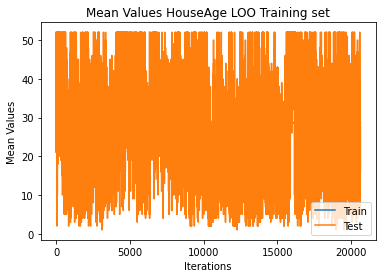

In [197]:
plot_d(HouseAgeloo[0],HouseAgeloo[1],"Mean Values HouseAge LOO Training set","Iterations","Mean Values")

### Imputation Using (Mean/Median) Values:
Many real-world datasets may contain missing values for various reasons.
Training a model with a dataset that has a lot of missing values can drastically impact the model’s quality.
One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values.


One strategy of imputing is to compute the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others.

**Among the previous strategies of splitting, which one would you suggest to use for imputing missing data? Motivate your answer.**

In [201]:
# I would use leave one out. Because it leaves out only one value then i would use the full feature Mean/Meadian
# To impute the missing values. 

In [202]:
# TODO
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Excercise #2: Cross-validation


Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

When evaluating different settings for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a validation set: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called **cross-validation**. A test set should still be held out for final evaluation, but a fixed validation set is no longer needed when doing CV and the model sees all the data (minus the test set). Cross-validation can be iteratively performed adopting different splitting techniques. For example, in `K-Fold CV`, the training set is split into K smaller sets. This procedure is followed for each of the K “folds”:
- A model is trained using K-1 folds as training data;
- the resulting model is validated on the remaining part of the data (using some performance measure, such as accuracy).

The performance measure reported by K-Fold cross-validation is then the average of the values computed in the loop.

Below a schamatic representation of 5-Fold cross-validation.


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="550" height="400" />



**Generate a labelled dataset for binary calssification using [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) with 600 samples, 2 classes and 200 features, use as classificator [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) and look for the regularization parameters in the interval $[10^{-5}, 10^{15}]$ using different splitting schemes. Hold out a test set and compare performances of different models.**

In [5]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification


In [75]:
X, y = make_classification(n_samples=600, n_features=200, flip_y=0.05, class_sep=0.6)

In [86]:
# TODO
#First split the data into training and testing for the first split. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
#Split the training dateset into k-folds using K-fold
from sklearn.model_selection import KFold
KfRidge = KFold(n_splits=10)


In [129]:
#Fit the classification model
from sklearn.model_selection import ShuffleSplit
McRidge = ShuffleSplit(n_splits=10, test_size=.2, random_state=1)

In [130]:
#Leave one out
from sklearn.model_selection import LeaveOneOut
looRidge = LeaveOneOut()

In [131]:
from sklearn.model_selection import cross_val_score
for i in range(-5,15):
    clf = RidgeClassifier(alpha=10**i)
    results = cross_val_score(clf,X_train,y_train,cv=kf_ridge,scoring='accuracy')
    #print(results.mean())

In [132]:
for i in range(-5,15):
    clf = RidgeClassifier(alpha=10**i)
    results = cross_val_score(clf,X_train,y_train,cv=looRidge,scoring='accuracy')
    print(results.mean())

0.7020833333333333
0.7020833333333333
0.7020833333333333
0.7020833333333333
0.7020833333333333
0.7020833333333333
0.7020833333333333
0.6958333333333333
0.6708333333333333
0.6208333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333
0.5083333333333333


In [134]:
l = "moses"
t = "moses"
l is t

True

In [139]:
def ridge(minalpha,maxapha,clf,X,Y,cv):
    final_results = []
    alpha_vals = []
    for i in range(minalpha,maxapha):
        clf = RidgeClassifier(alpha=10**i)
        results = cross_val_score(clf,X_test,y_test,cv=cv,scoring='accuracy')
        if cv == McRidge or cv == KfRidge:
            print(results)
        final_results.append(results.mean())
        alpha_vals.append(i)
    print("Best Accuracy",max(final_results))    
    #print(final_results.index(max(final_results)))
    print("Best alpha ","10**"+str(alpha_vals[final_results.index(max(final_results))]))

In [ ]:
ridge(-5,15,clf,X_train,y_train,looRidge)

**Repeat the previous procedure using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and compare the selected parameters**

In [12]:
from sklearn.model_selection import ShuffleSplit
>>> n_samples = X.shape[0]
>>> cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
>>> cross_val_score(clf, X, y, cv=cv)
array([0.977..., 0.977..., 1.  ..., 0.955..., 1.        ])

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

## Exercise #3: Unbalanced classes

When dealing with unbalanced classes, caution must be used when splitting data into train/validation/test.

**Can you guess why?**

In [ ]:
# TODO

**Use both Ridge Classifier and Logistic Regression for classification on the dataset** [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

The dataset contains transactions made by credit cards in September 2013 by european cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We further select the number of non-fraudulent transations so that the imbalance is less severe and the ratio is 5%.

**Make use of KFold and StratifiedKFold techniques for splitting data and two different scores during training/validation : `accuracy` and `balanced accuracy`.**

The `accuracy` in binary classification is defined as 

$$\dfrac{TN+TP}{TN+TP+FP+FN}$$ 

it quantifies the proportion of true results among the total number of cases examined. While the `balanced accuracy` is defined as:

$$\frac{1}{2}\,\bigg{[}\dfrac{TP}{TP+FN}+\dfrac{TN}{TN+FP}\bigg{]}$$

which is the average of recall obtained on each class.

**What can you conclude by the comparison of the trained models performances? Motivate your answer**

In [ ]:
credit = pd.read_csv('creditcard.csv')
credit.head()

In [ ]:
credit.Class.value_counts()

In [ ]:
X = credit.drop(['Time','Class'],axis = 1).values
y = credit['Class'].values

In [ ]:
np.random.seed(42)
pos_ind = np.where(y==1)[0]
neg_ind = np.random.choice(np.where(y==0)[0],9840,replace = False)
ind = np.sort(np.hstack((pos_ind,neg_ind)))

In [ ]:
X = X[ind,:]
y = y[ind]

In [ ]:
X.shape,y.shape

In [ ]:
# TODO

**Extra: can you think about other strategies to deal with unbalanced datasets?**

In [ ]:
# TODO